In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1

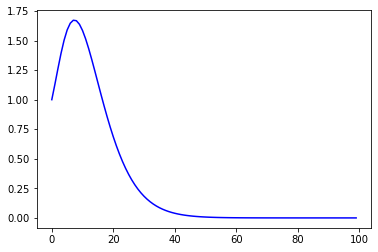

In [2]:
#s = np.random.normal(0, 0.1, 1000)
dim      = 100
growth1  = np.zeros((dim,1))
growth2  = np.zeros((dim,1))
a        = np.array([[0.9,0.3],[0.,0.9]])
x_0      = np.array([[1],[0]])
for tau in range(0,dim):
    G_tau    = np.linalg.matrix_power(a, tau)
    h        = np.matmul(np.matrix(G_tau).getH(),G_tau)
    w,v      = np.linalg.eig(h)
    growth1[tau,:] = np.max(w)

plt.figure()
plt.plot(growth1,'b')

In [3]:
print(np.matmul(a, np.array([1, 0])))

[0.9 0. ]


In [4]:
def getMaxGrowth(dim, a, x_0):
    growth  = np.zeros((dim,2))
    growth[0] = x_0
    for tau in range(1,dim):
        growth[tau] = np.matmul(a, growth[tau-1, :])
    growth[:, 0] /= x_0[0]
    growth[:, 1] /= x_0[1]
    return growth

In [35]:
x = np.linspace(0, 10, 101)
y = np.linspace(0, 10, 101)
meshX0 = np.zeros(shape=(101, 101, 2))
meshX0[:, :, 0] = np.meshgrid(x, y)[0]
meshX0[:, :, 1] = np.meshgrid(x, y)[1]

In [36]:
print(meshX0[70, 70, :])

[7. 7.]


(100, 2)


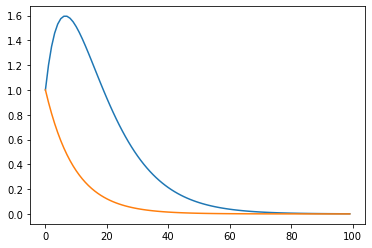

In [37]:
example = getMaxGrowth(dim, a, meshX0[70, 70, :])
print(example.shape)
plt.plot(example[:, 0])
plt.plot(example[:, 1])

(100, 2)
[1. 1.]


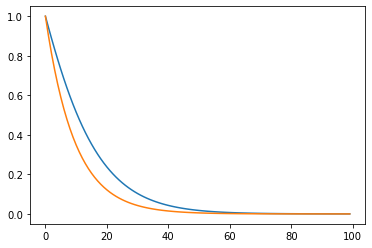

In [38]:
example = getMaxGrowth(dim, a, meshX0[10, 70, :])
print(example.shape)
print(meshX0[10, 10, :])
plt.plot(example[:, 0])
plt.plot(example[:, 1])

In [39]:
maxGrowth = np.zeros(shape=(101, 101, dim, 2))
for i in range(101):
    if i % 10 == 0: print(i)
    for j in range(101):
        maxGrowth[i, j] = getMaxGrowth(dim, a, meshX0[i, j, :])

0
10


<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 0] /= x_0[0]
<ipython-input-4-a17232b1f5b1>:7: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 1] /= x_0[1]
<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: divide by zero encountered in true_divide
  growth[:, 0] /= x_0[0]


20
30
40
50
60
70
80
90
100


[2.95126654e-05 2.95126654e-05 2.95126654e-05 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Max Growth Ratio of y')

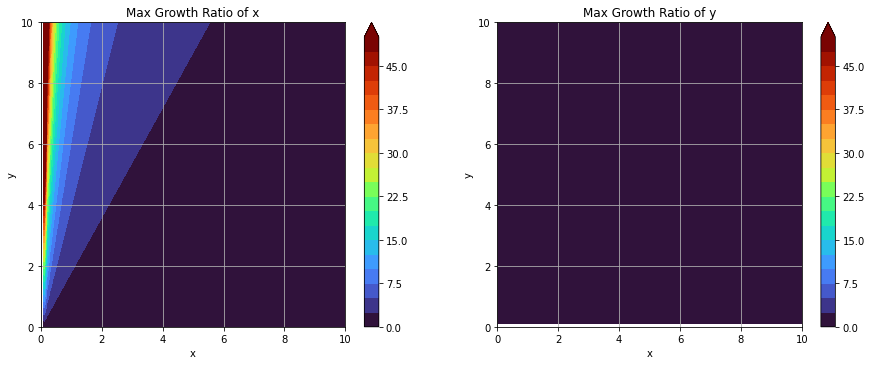

In [50]:
print(np.unique(maxGrowth))
cmap = plt.get_cmap("turbo", 21)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].set(aspect='equal')
plt.sca(axes[0])
plotData = np.max(maxGrowth[:, :, :, 0], 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of x")
axes[1].set(aspect='equal')
plt.sca(axes[1])
plotData = np.max(maxGrowth[:, :, :, 1], 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of y")

Text(0.5, 1.0, 'Time to Reach Max Growth Ratio of y')

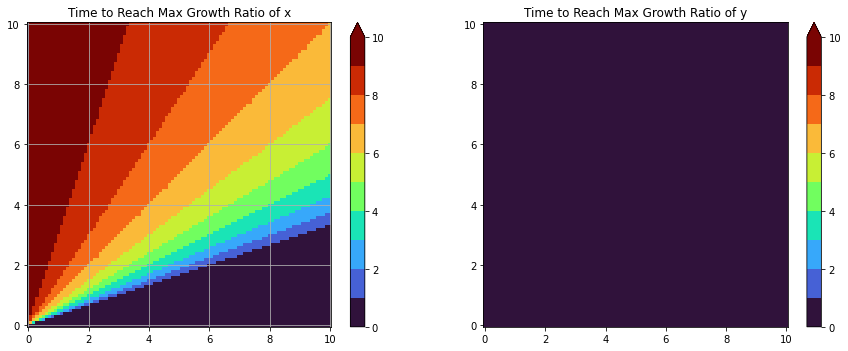

In [53]:
cmap = plt.get_cmap("turbo", 10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].set(aspect='equal')
plt.sca(axes[0])
plotData = np.argmax(maxGrowth[:, :, :, 0], 2)
plt.pcolormesh(x, y, plotData, vmin=0, vmax=dim//10, shading="nearest", cmap=cmap)
plt.colorbar(extend='max', shrink=0.8)
plt.grid(True)
plt.title("Time to Reach Max Growth Ratio of x")
axes[1].set(aspect='equal')
plt.sca(axes[1])
plotData = np.argmax(maxGrowth[:, :, :, 1], 2)
plt.pcolormesh(x, y, plotData, vmin=0, vmax=dim//10, shading="nearest", cmap=cmap)
plt.colorbar(extend='max', shrink=0.8)
plt.title("Time to Reach Max Growth Ratio of y")

# 2

In [95]:
a = np.array([[0.9,1.5],[0.,0.9]])

[7. 7.]
(100, 2)


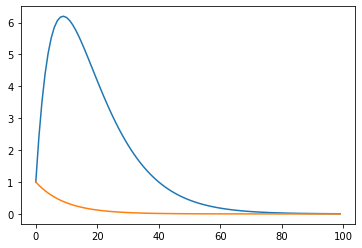

In [96]:
example = getMaxGrowth(dim, a, meshX0[70, 70, :])
print(meshX0[70, 70, :])
print(example.shape)
plt.plot(example[:, 0])
plt.plot(example[:, 1])

[9.9 0.1]
(100, 2)


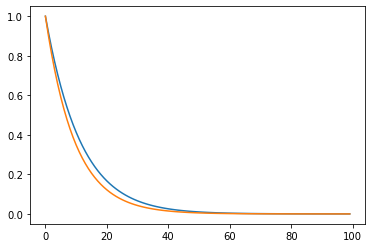

In [97]:
example = getMaxGrowth(dim, a, meshX0[1, 90, :])
print(meshX0[1, 99, :])
print(example.shape)
plt.plot(example[:, 0])
plt.plot(example[:, 1])

In [98]:
maxGrowth = np.zeros(shape=(101, 101, dim, 2))
for i in range(101):
    if i % 10 == 0: print(i)
    for j in range(101):
        maxGrowth[i, j] = getMaxGrowth(dim, a, meshX0[i, j, :])

0
10


<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 0] /= x_0[0]
<ipython-input-4-a17232b1f5b1>:7: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 1] /= x_0[1]
<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: divide by zero encountered in true_divide
  growth[:, 0] /= x_0[0]


20
30
40
50
60
70
80
90
100


[2.95126654e-05 2.95126654e-05 2.95126654e-05 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Max Growth Ratio of y')

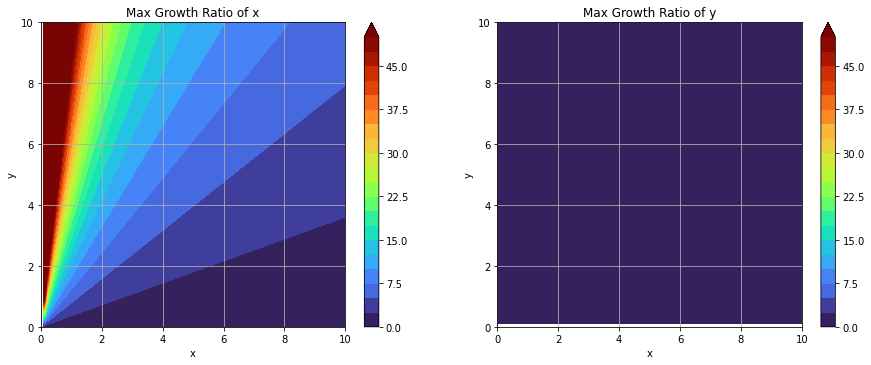

In [99]:
print(np.unique(maxGrowth))
cmap = plt.get_cmap("turbo", 50)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].set(aspect='equal')
plt.sca(axes[0])
plotData = np.max((maxGrowth[:, :, :, 0]), 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of x")
axes[1].set(aspect='equal')
plt.sca(axes[1])
plotData = np.max((maxGrowth[:, :, :, 1]), 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of y")

In [100]:
a = np.array([[0.7,0.3],[0.,0.7]])

[7. 7.]
(100, 2)


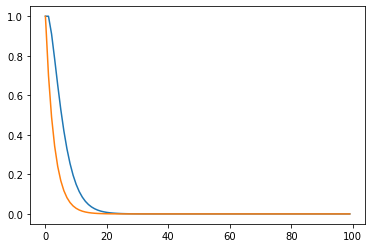

In [101]:
example = getMaxGrowth(dim, a, meshX0[70, 70, :])
print(meshX0[70, 70, :])
print(example.shape)
plt.plot(example[:, 0])
plt.plot(example[:, 1])

[9.9 0.1]
(100, 2)


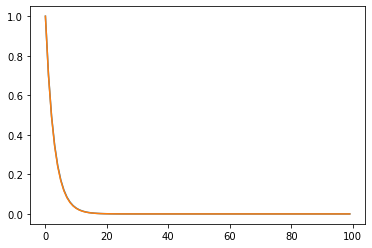

In [102]:
example = getMaxGrowth(dim, a, meshX0[1, 90, :])
print(meshX0[1, 99, :])
print(example.shape)
plt.plot(example[:, 0])
plt.plot(example[:, 1])

In [103]:
maxGrowth = np.zeros(shape=(101, 101, dim, 2))
for i in range(101):
    if i % 10 == 0: print(i)
    for j in range(101):
        maxGrowth[i, j] = getMaxGrowth(dim, a, meshX0[i, j, :])

0
10


<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 0] /= x_0[0]
<ipython-input-4-a17232b1f5b1>:7: RuntimeWarning: invalid value encountered in true_divide
  growth[:, 1] /= x_0[1]
<ipython-input-4-a17232b1f5b1>:6: RuntimeWarning: divide by zero encountered in true_divide
  growth[:, 0] /= x_0[0]


20
30
40
50
60
70
80
90
100


[4.62068073e-16 4.62068073e-16 4.62068073e-16 ...            nan
            nan            nan]


<ipython-input-107-eda8b40f8cc4>:9: UserWarning: No contour levels were found within the data range.
  plt.contour(x, y, plotData, colors='white', levels=[1])


Text(0.5, 1.0, 'Max Growth Ratio of y')

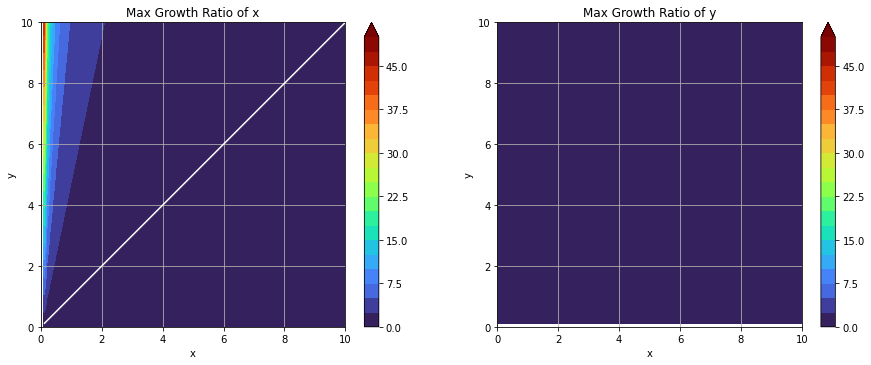

In [107]:
print(np.unique(maxGrowth))
cmap = plt.get_cmap("turbo", 50)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].set(aspect='equal')
plt.sca(axes[0])
plotData = np.max((maxGrowth[:, :, :, 0]), 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.contour(x, y, plotData, colors='white', levels=[1])
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of x")
axes[1].set(aspect='equal')
plt.sca(axes[1])
plotData = np.max((maxGrowth[:, :, :, 1]), 2)
plt.contourf(x, y, plotData, cmap=cmap, levels=np.linspace(0, 50, 21), extend='max')
plt.colorbar(shrink=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Max Growth Ratio of y")